Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1000 non-null   float64
 1   x1      1000 non-null   float64
 2   x2      1000 non-null   float64
 3   x3      1000 non-null   object 
dtypes: float64(3), object(1)
memory usage: 31.4+ KB
None
              y         x1          x2 x3
0  18546.674932  58.620100  202.906299  B
1  16616.498903  56.019437  192.718794  B
2  12773.312433  47.857470  189.915798  A
3  14613.038340  46.831493  199.289231  B
4  16549.372517  51.656511  201.500167  C

Checking for missing values...
y       0
x1      0
x2      0
x3_B    0
x3_C    0
dtype: int64

Ensuring all columns in the dataset are numeric before splitting...

Dropping rows with invalid values...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  

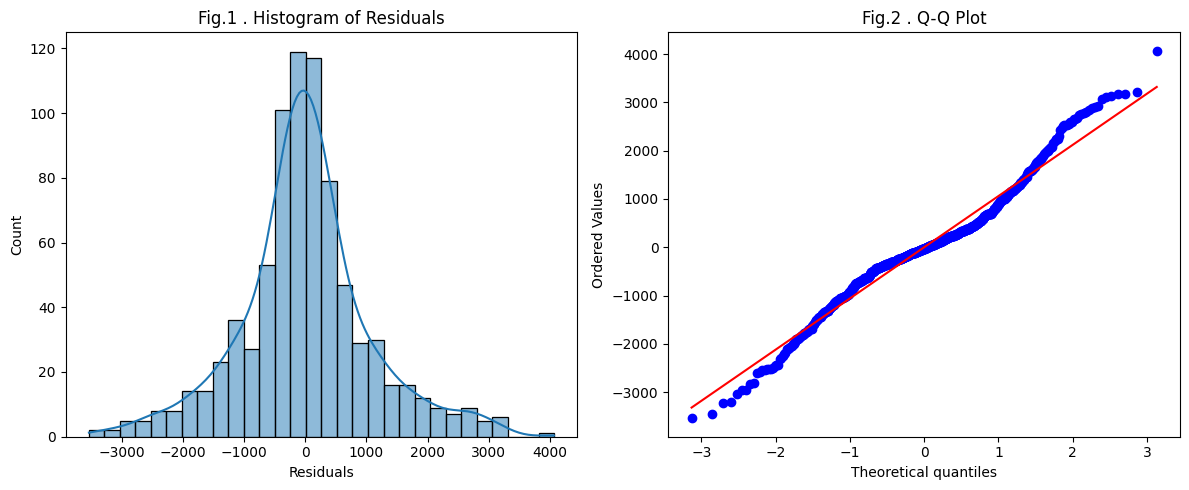

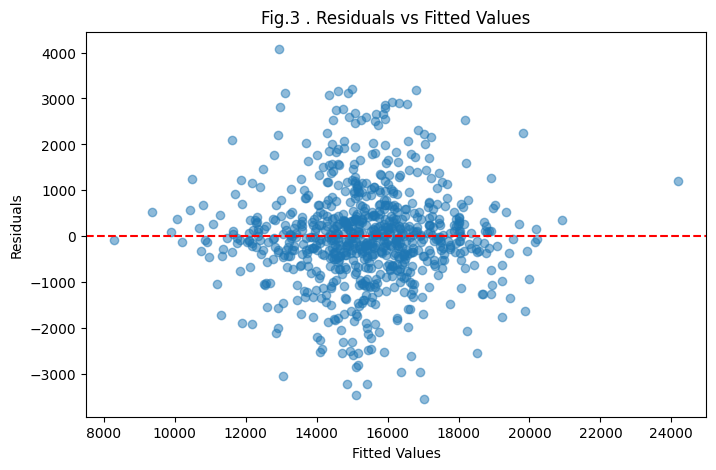


Evaluating model on the test set...
Mean Squared Error (Test Set): 755598.4555
R-squared (Test Set): 0.8020
Accuracy (Test Set): 95.76%
Shapiro-Wilk Test: W=0.9698, p-value=8.3019e-12


In [20]:

# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = r'D:/Statistics/mlr2.csv'  # Use raw string for file path
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print(data.head())

# Data Cleaning: Convert categorical variable 'x3' into dummy variables
data_encoded = pd.get_dummies(data, columns=['x3'], drop_first=True)

# Check for missing values and handle them
print("\nChecking for missing values...")
print(data_encoded.isnull().sum())
if data_encoded.isnull().sum().sum() > 0:
    print("Missing values detected. Filling missing values...")
    data_encoded = data_encoded.fillna(data_encoded.mean())  # Fill missing values with mean

# Ensure all necessary columns in the dataset are numeric
print("\nEnsuring all columns in the dataset are numeric before splitting...")
for col in data_encoded.columns:
    data_encoded[col] = pd.to_numeric(data_encoded[col], errors='coerce')

# Drop rows with invalid (non-numeric) values after conversion
print("\nDropping rows with invalid values...")
data_encoded = data_encoded.dropna()
print(data_encoded.info())

# Define the independent variables (X) and dependent variable (y)
X = data_encoded[['x1', 'x2', 'x3_B', 'x3_C']]
y = data_encoded['y']

# Add a constant to the model for the intercept
X = sm.add_constant(X)  # Add intercept

# Split the data into training and testing sets using random seed = 22248242
SEED = 22248242
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Ensure Training and Test Data are Numeric
print("\nChecking training and test sets for numeric types...")
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

# Fit the multiple linear regression model on training data
print("\nFitting the model...")
model_train = sm.OLS(y_train, X_train).fit()

# Display the model summary
print(model_train.summary())

# Residual Analysis
# Calculate residuals
residuals = model_train.resid

# Plot residuals to check for normality
plt.figure(figsize=(12, 5))

# Residuals histogram
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, bins=30)
plt.title('Fig.1 . Histogram of Residuals')
plt.xlabel('Residuals')

# Q-Q plot for normality
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Fig.2 . Q-Q Plot')

plt.tight_layout()
plt.show()

# Plot residuals vs fitted values to check for homoscedasticity
fitted_values = model_train.fittedvalues

plt.figure(figsize=(8, 5))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Fig.3 . Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Test model performance on test set
print("\nEvaluating model on the test set...")
y_pred = model_train.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = 100 * (abs(y_test - y_pred) / y_test).mean()
# Convert MAPE to Accuracy
accuracy = 100 - mape
 
print(f"Mean Squared Error (Test Set): {mse:.4f}")
print(f"R-squared (Test Set): {r2:.4f}")
print(f"Accuracy (Test Set): {accuracy:.2f}%")
 
# Perform statistical tests for normality (Shapiro-Wilk test)
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test: W={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4e}')


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1000 non-null   float64
 1   x1      1000 non-null   float64
 2   x2      1000 non-null   float64
 3   x3      1000 non-null   object 
dtypes: float64(3), object(1)
memory usage: 31.4+ KB
None
              y         x1          x2 x3
0  18546.674932  58.620100  202.906299  B
1  16616.498903  56.019437  192.718794  B
2  12773.312433  47.857470  189.915798  A
3  14613.038340  46.831493  199.289231  B
4  16549.372517  51.656511  201.500167  C

Checking for missing values...
y       0
x1      0
x2      0
x3_B    0
x3_C    0
dtype: int64

Ensuring all columns in the dataset are numeric before splitting...

Dropping rows with invalid values...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  

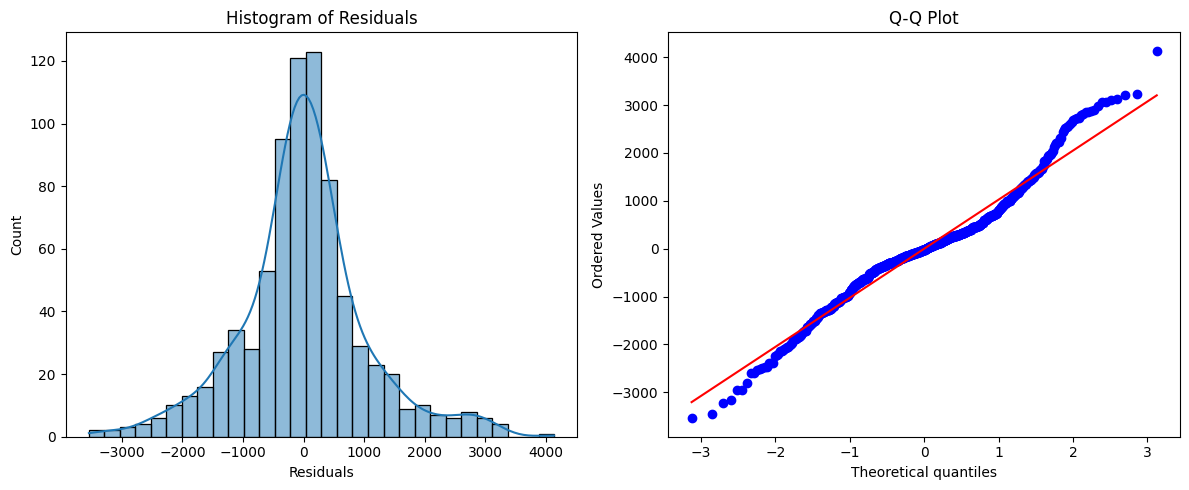

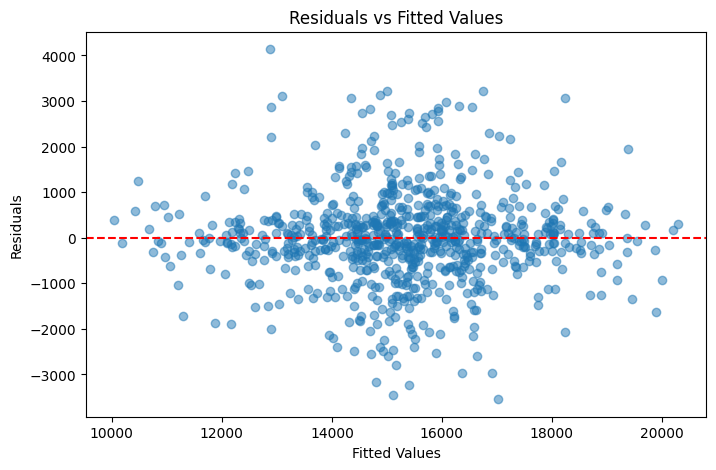

Mean Squared Error (Test Set): 1046563.6015
R-squared (Test Set): 0.7270


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = r'D:/Statistics/mlr2.csv'  # Use raw string for file path
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print(data.head())

# Data Cleaning: Convert categorical variable 'x3' into dummy variables
data_encoded = pd.get_dummies(data, columns=['x3'], drop_first=True)

# Check for missing values and handle them
print("\nChecking for missing values...")
print(data_encoded.isnull().sum())
if data_encoded.isnull().sum().sum() > 0:
    print("Missing values detected. Filling missing values...")
    data_encoded = data_encoded.fillna(data_encoded.mean())  # Fill missing values with mean

# Ensure all necessary columns in the dataset are numeric
print("\nEnsuring all columns in the dataset are numeric before splitting...")
for col in data_encoded.columns:
    data_encoded[col] = pd.to_numeric(data_encoded[col], errors='coerce')

# Drop rows with invalid (non-numeric) values after conversion
print("\nDropping rows with invalid values...")
data_encoded = data_encoded.dropna()
print(data_encoded.info())

# Check for outliers using Z-score method
z_scores = np.abs(stats.zscore(data_encoded.select_dtypes(include=[np.number])))
outliers = (z_scores > 3)  # Values with Z-score > 3 are considered outliers

# Remove the outliers
data_no_outliers = data_encoded[(z_scores < 3).all(axis=1)]

# Display information about the data after removing outliers
print("\nData after removing outliers:")
print(data_no_outliers.info())

# Define the independent variables (X) and dependent variable (y)
X = data_no_outliers[['x1', 'x2', 'x3_B', 'x3_C']]
y = data_no_outliers['y']

# Add a constant to the model for the intercept
import statsmodels.api as sm
X = sm.add_constant(X)  # Add intercept

# Split the data into training and testing sets using random seed = 22248242
SEED = 22248242
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Ensure Training and Test Data are Numeric
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

# Fit the multiple linear regression model on training data
print("\nFitting the model...")
model_train = sm.OLS(y_train, X_train).fit()

# Display the model summary
print(model_train.summary())

residuals = model_train.resid

# Plot residuals to check for normality
plt.figure(figsize=(12, 5))

# Residuals histogram
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')

# Q-Q plot for normality
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

# Plot residuals vs fitted values to check for homoscedasticity
fitted_values = model_train.fittedvalues

plt.figure(figsize=(8, 5))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


# Test model performance on test setresiduals = model_train.resid
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Test Set): {mse:.4f}")
print(f"R-squared (Test Set): {r2:.4f}")

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Initialize the model
model = LinearRegression()

# Perform 10-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Print the results
print(f"Cross-validated MSE: {-np.mean(cv_scores):.4f}")
print(f"Cross-validated R-squared: {np.mean(cross_val_score(model, X_train, y_train, cv=10)): .4f}")

Cross-validated MSE: 1090354.4136
Cross-validated R-squared:  0.7354
